In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib widget


In [2]:
from struct import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ucitavanje_slika(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_slika = unpack(">I", fp.read(4))[0]
        broj_redova = unpack(">I", fp.read(4))[0]
        broj_kolona = unpack(">I", fp.read(4))[0]
        
        slike = np.frombuffer(fp.read(broj_slika*broj_redova*broj_kolona), dtype=np.uint8).reshape((broj_slika, broj_redova, broj_kolona))

        return slike

def ucitavanje_labela(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_labela = unpack(">I", fp.read(4))[0]
        labele = np.frombuffer(fp.read(broj_labela), dtype=np.uint8)
        return labele

train_slike = ucitavanje_slika("train-images.idx3-ubyte")
train_labele = ucitavanje_labela("train-labels.idx1-ubyte")

test_slike = ucitavanje_slika("t10k-images.idx3-ubyte")
test_labele = ucitavanje_labela("t10k-labels.idx1-ubyte")

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

vektori = train_slike.reshape(train_slike.shape[0], 28*28)

rezultat = pca.fit_transform(vektori)

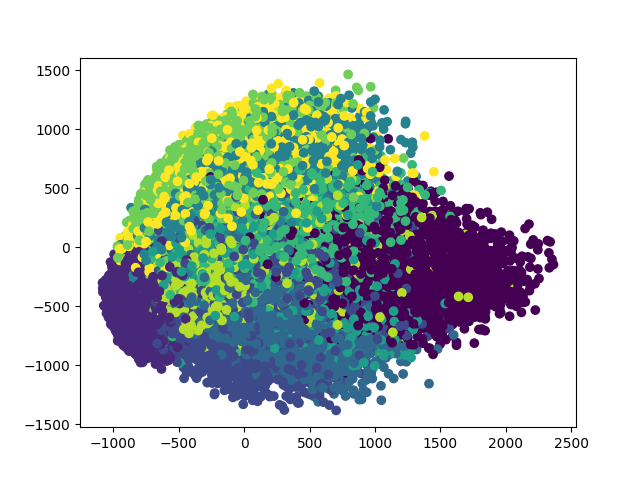

In [9]:
plt.figure()

plt.scatter(rezultat[:, 0], rezultat[:, 1], c=train_labele)

plt.show()